In [2]:
# imports and setup
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option('precision', 4) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.5f}'.format) # get rid of scientific notation

plt.style.use('seaborn') # pretty matplotlib plots

## 9.6.1 Support Vector Machine

In [3]:
np.random.seed(42)
X=np.random.normal(size=40).reshape(20,2)
y=np.concatenate((np.ones(10,dtype=np.int64)*-1,np.ones(10,dtype=np.int64)))
X[y==1,:] += 1

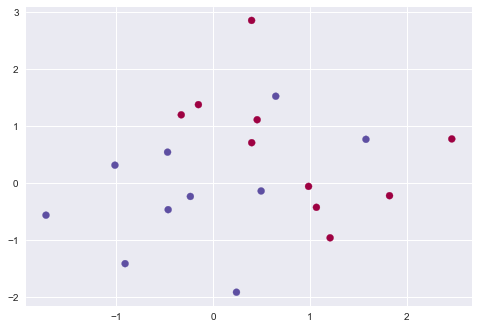

In [4]:
plt.scatter(X[:,0],X[:,1],c=(3-y),cmap='Spectral')

In [15]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',C=10)
svc.fit(X,y)

SVC(C=10, kernel='linear')

/Users/appler/opt/anaconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.scatter(x_data,


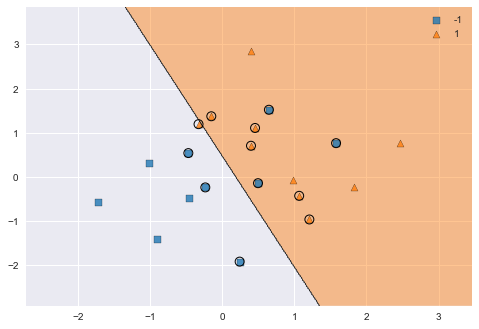

In [17]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X,y,clf = svc,
                      X_highlight = svc.support_vectors_);

In [18]:
#support vectors
pd.DataFrame(svc.support_vectors_, index = svc.support_)

,0,1
0,0.49671,-0.13826
1,0.64769,1.52303
2,-0.23415,-0.23414
3,1.57921,0.76743
4,-0.46947,0.54256
6,0.24196,-1.91328
11,1.06753,-0.42475
12,0.45562,1.11092
13,-0.15099,1.37570
14,0.39936,0.70831


/Users/appler/opt/anaconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.scatter(x_data,


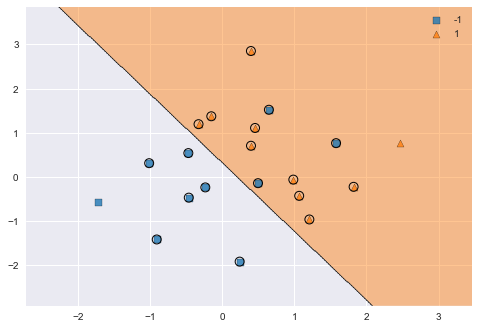

In [19]:
svc2 = SVC(kernel = 'linear', C = 0.1)
svc2.fit(X,y)
plot_decision_regions(X,y,clf = svc2,X_highlight = svc2.support_vectors_);

In [21]:
pd.DataFrame(svc2.support_vectors_, index = svc2.support_)

,0,1
0,0.49671,-0.13826
1,0.64769,1.52303
2,-0.23415,-0.23414
3,1.57921,0.76743
4,-0.46947,0.54256
...,...,...
15,0.39829,2.85228
16,0.98650,-0.05771
17,1.82254,-0.22084
18,1.20886,-0.95967


In [22]:
from sklearn.model_selection import GridSearchCV

svc3 = SVC(kernel='linear')
c_space = np.array([0.001,0.01,0.1,1,5,10,100])
param_grid = {'C': c_space}

In [23]:
tune = GridSearchCV(svc3,param_grid,cv = 10)
tune.fit(X,y)

tune.cv_results_
tune.best_params_ #在C=0.01时，交叉验证的错误率最低

{'C': 0.001}

In [24]:
from sklearn.utils import resample
np.random.seed(42)
X_test = np.random.normal(size=40).reshape(20,2)
y_test = resample(np.concatenate((np.ones(10,dtype=np.int64)*-1,np.ones(10,dtype=np.int64))),
                  replace=True, n_samples=20,random_state=42)
X_test[y_test == 1,:] += 1
y_pred = tune.predict(X_test)

(<Figure size 576x396 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff147414dc0>)

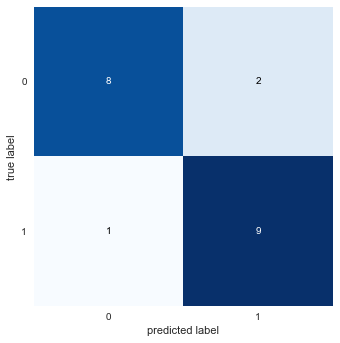

In [25]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(confusion_matrix(y_test,y_pred))

(<Figure size 576x396 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff14744be80>)

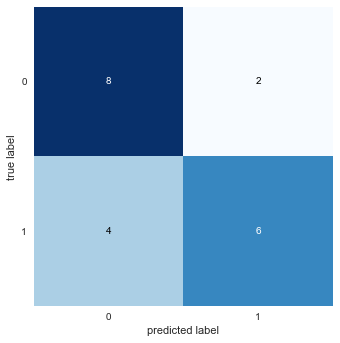

In [27]:
svc4 = SVC(kernel = 'linear',C = 0.01)
svc4.fit(X_test,y_test)

y_pred4 = svc4.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test,y_pred4))

In [28]:
X[y==1,:] += 1.1

In [31]:
X

array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473],
       [-0.46947439,  0.54256004],
       [-0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024],
       [-1.72491783, -0.56228753],
       [-1.01283112,  0.31424733],
       [-0.90802408, -1.4123037 ],
       [ 3.56564877,  1.8742237 ],
       [ 2.1675282 ,  0.67525181],
       [ 1.55561728,  2.21092259],
       [ 0.94900642,  2.47569802],
       [ 1.49936131,  1.80830625],
       [ 1.49829339,  3.95227818],
       [ 2.08650278,  1.04228907],
       [ 2.92254491,  0.87915635],
       [ 2.3088636 ,  0.14032988],
       [ 0.77181395,  2.29686124]])

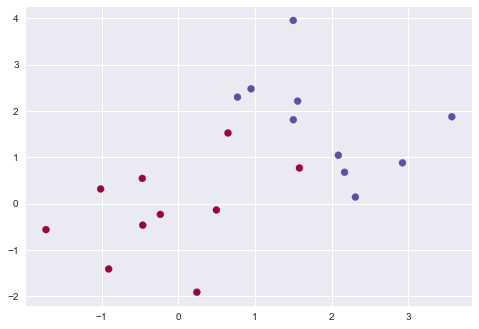

In [33]:
plt.scatter(X[:,0], X[:,1], c = (y + 5) / 2,cmap = 'Spectral')

(<Figure size 576x396 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff145e99820>)

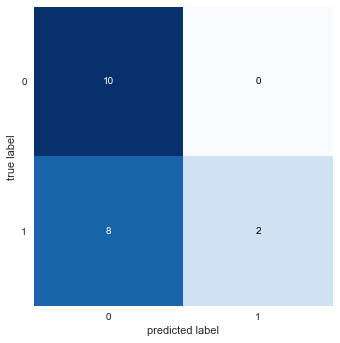

In [37]:
svc5=SVC(kernel='linear',C=1e5)
svc5.fit(X,y)

y_pred5=svc5.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test,y_pred5))

/Users/appler/opt/anaconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.scatter(x_data,


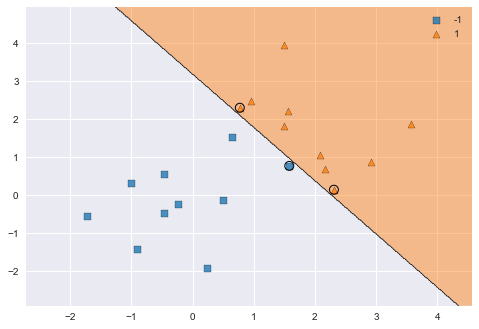

In [38]:
plot_decision_regions(X,y,clf=svc5,X_highlight=svc5.support_vectors_)

/Users/appler/opt/anaconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.scatter(x_data,


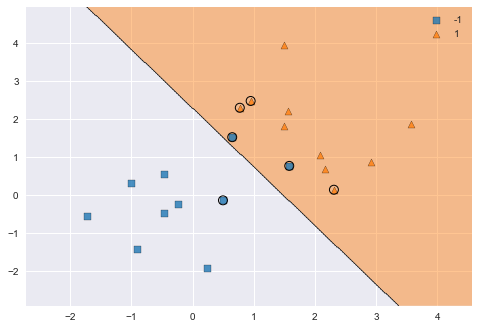

In [40]:
svc6=SVC(kernel='linear',C=1)
svc6.fit(X,y)
plot_decision_regions(X,y,clf=svc6,X_highlight=svc6.support_vectors_)

## 9.6.2 Support Vector Machine

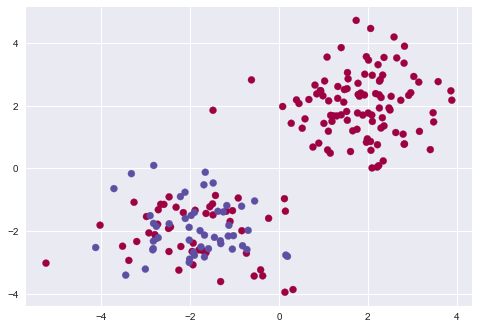

In [45]:
np.random.seed(42)

X = np.random.normal(size = 400).reshape(200,2)
X[0:100, :] += 2
X[100:500, :] -= 2
y = np.concatenate((np.full(150, 1, dtype=np.int64), np.full(50, 2, dtype = np.int64)))

plt.scatter(X[:,0], X[:,1], c = y, cmap = 'Spectral')

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.5,test_size = 0.5,random_state = 42)

/Users/appler/opt/anaconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.scatter(x_data,


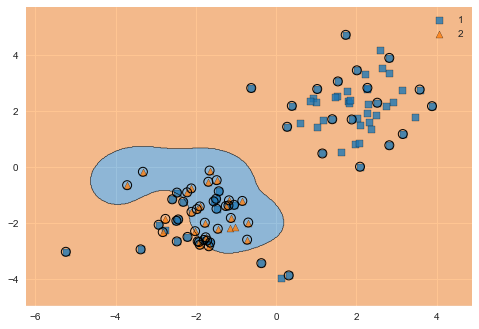

In [48]:
#非线性决策边界，多项式
svm = SVC(kernel='rbf',gamma = 1,C = 1)
svm.fit(X_train,y_train)
plot_decision_regions(X_train,y_train, clf = svm, X_highlight = svm.support_vectors_)

/Users/appler/opt/anaconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.scatter(x_data,


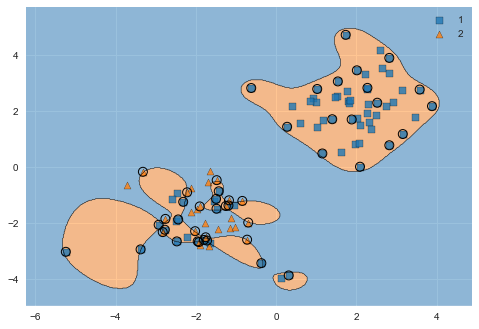

In [49]:
#增大cost的值，减少训练数据的误差，得到一个更加不规则的决策边界，产生过拟合数据的风险
svm2=SVC(kernel='rbf',gamma=1,C=1e5)
svm2.fit(X_train,y_train)

plot_decision_regions(X_train,y_train,clf = svm2, X_highlight = svm2.support_vectors_)

In [50]:
#使用tune()函数，使用交叉验证来选择径向核函数最优的gamma值以及cost的值
svm3=SVC(kernel='rbf')
c_space = np.array([0.1,1,10,100,1000])
g_space=np.array([0.5,1,2,3,4])
param_grid={'C': c_space,'gamma':g_space}

tune=GridSearchCV(svm3,param_grid,cv=10)
tune.fit(X_train,y_train)

tune.cv_results_
tune.best_params_

{'C': 100.0, 'gamma': 4.0}

In [51]:
y_pred=tune.predict(X_test)

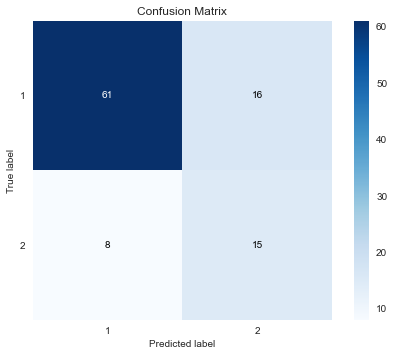

In [52]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred)
#这个SVM误分了39%的测试观测

## 9.6.3 ROC Curves

In [71]:
svm4=SVC(kernel='rbf',gamma=2,C=1,probability=True)
svm4.fit(X_train,y_train)

svm5=SVC(kernel='rbf',gamma=50,C=1,probability=True)
svm5.fit(X_train,y_train)

y_probas4=svm4.predict_proba(X_train)
y_probas5=svm5.predict_proba(X_train)

/Users/appler/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
/Users/appler/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


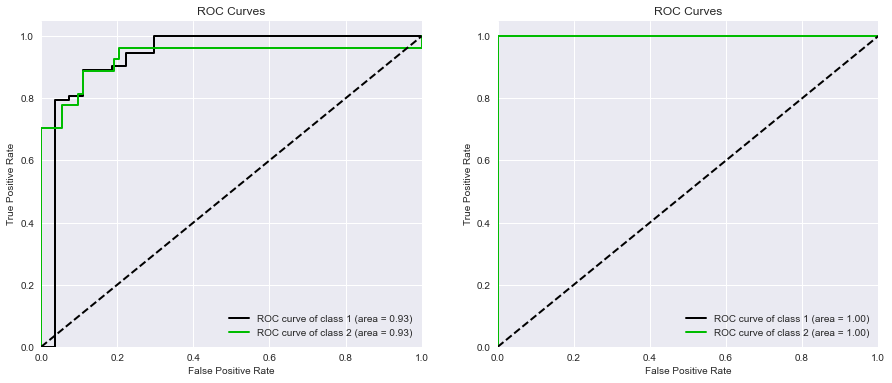

In [72]:
f,axes=plt.subplots(1,2,sharex=False,sharey=False)
f.set_figheight(6)
f.set_figwidth(15)

skplt.metrics.plot_roc_curve(y_train,y_probas4,curves=['each_class'],ax=axes[0])
skplt.metrics.plot_roc_curve(y_train,y_probas5,curves=['each_class'],ax=axes[1])

/Users/appler/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
/Users/appler/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


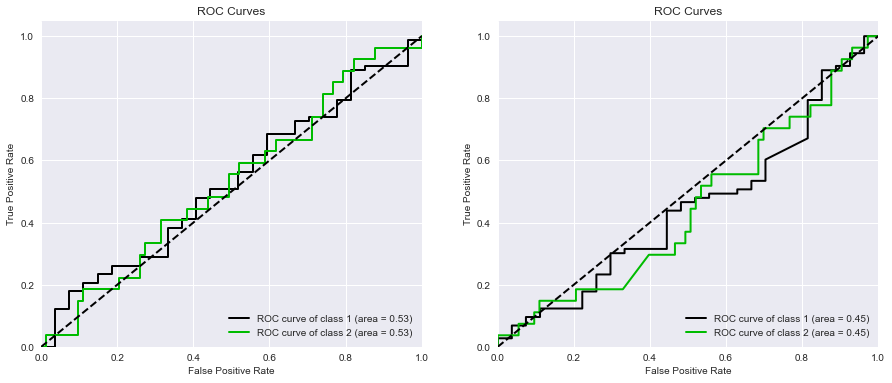

In [75]:
#测试数据的返回结果显示精度非常低，可以近似去除
y_probas_test_4 = svm4.predict_proba(X_test)
y_probas_test_5 = svm5.predict_proba(X_test)

f,axes = plt.subplots(1,2,sharex = False,sharey = False)
f.set_figheight(6)
f.set_figwidth(15)

skplt.metrics.plot_roc_curve(y_train,y_probas_test_4,curves=['each_class'],ax=axes[0])
skplt.metrics.plot_roc_curve(y_train,y_probas_test_5,curves=['each_class'],ax=axes[1])

## 9.6.4 SVM with multiple class 多分类的SVM

In [76]:
np.random.seed(42)

X = np.random.normal(size = 400).reshape(200,2)
X[0:100,:] += 2 
X[100:150,:] -= 2
y = np.concatenate((np.full(150,1,dtype=np.int64),np.full(50,2,dtype=np.int64)))

In [77]:
X = np.concatenate((X,np.random.normal(size=100).reshape(50,2)))
y = np.concatenate((y,np.full(50,0,dtype=np.int64)))

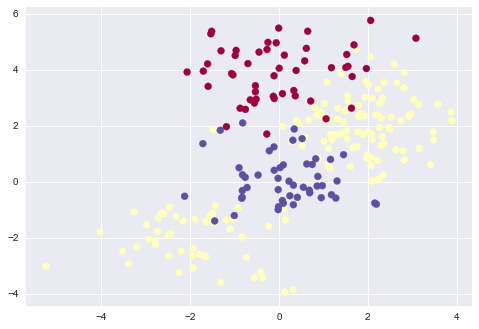

In [79]:
X[y==0,1] += 2
plt.scatter(X[:,0],X[:,1],c=y+1,cmap='Spectral')

/Users/appler/opt/anaconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.scatter(x_data,


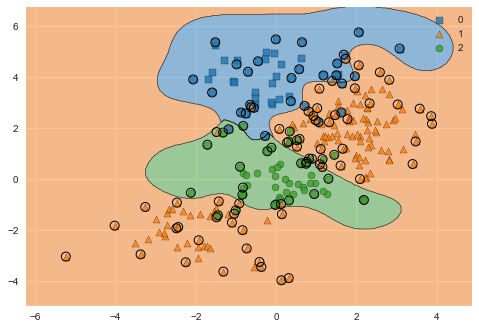

In [88]:
svm_m=SVC(kernel='rbf',C=10,gamma=1)
svm_m.fit(X,y)
plot_decision_regions(X,y,
                      clf=svm_m,
                      X_highlight = svm_m.support_vectors_)

# 9.6.5 Application to Gene Expression Data

In [81]:
khan_X_train = pd.read_csv('/Users/appler/Desktop/ISLR/Khan_xtrain.csv',index_col=0)
khan_y_train = pd.read_csv('/Users/appler/Desktop/ISLR/Khan_ytrain.csv',index_col=0)
khan_X_test = pd.read_csv('/Users/appler/Desktop/ISLR/Khan_xtest.csv',index_col=0)
khan_y_test = pd.read_csv('/Users/appler/Desktop/ISLR/Khan_ytest.csv',index_col=0)

In [82]:
khan_X_train.shape,khan_y_train.shape,khan_X_test.shape,khan_y_test.shape
#相对于观测的数目来说，特征的数目非常多

((63, 2308), (63, 1), (20, 2308), (20, 1))

In [83]:
khan_y_train.iloc[:,0].value_counts(sort=False)

1     8
2    23
3    12
4    20
Name: x, dtype: int64

In [84]:
khan_y_test.iloc[:,0].value_counts(sort=False)

1    3
2    6
3    6
4    5
Name: x, dtype: int64

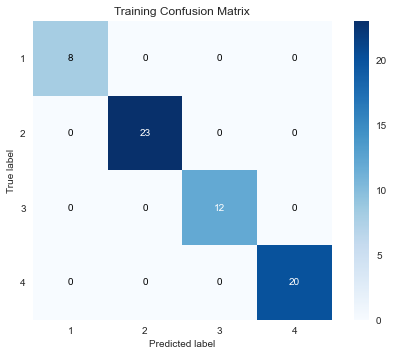

In [86]:
out = SVC(kernel='linear',C=10)
out.fit(khan_X_train,khan_y_train.iloc[:,0])

khan_y_train_pred = out.predict(khan_X_train)

skplt.metrics.plot_confusion_matrix(khan_y_train,
                                    khan_y_train_pred,
                                    title='Training Confusion Matrix');

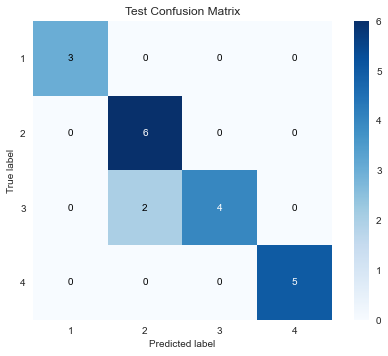

In [87]:
#测试集全部被正确分类
khan_y_test_pred=out.predict(khan_X_test)

skplt.metrics.plot_confusion_matrix(khan_y_test,
                                    khan_y_test_pred,
                                    title='Test Confusion Matrix');